In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### A Little EDA on Total Aggregated Survey Data

In [2]:
total_2015 = pd.read_csv('../data/clean_survey/2015_total.csv')
total_2016 = pd.read_csv('../data/clean_survey/2016_total.csv')
total_2017 = pd.read_csv('../data/clean_survey/2017_total.csv')
total_2018 = pd.read_csv('../data/clean_survey/2018_total.csv')
total_2019 = pd.read_csv('../data/clean_survey/2019_total.csv')

In [3]:
total_2015.head(2)

,dbn,school_name,parent_response_rate,teacher_response_rate,student_response_rate,collab_teachers,leadership,instruction,support,ties,trust
0,01M015,P.S. 015 Roberto Clemente,62.0,100.0,0.0,94.0,91.0,89.0,86.0,85.0,94.0
1,01M019,P.S. 019 Asher Levy,100.0,98.0,0.0,96.0,90.0,96.0,97.0,86.0,94.0


In [4]:
responses_2015 = total_2015.iloc[:, :5]
responses_2016 = total_2016.iloc[:, :5]
responses_2017 = total_2017.iloc[:, :5]
responses_2018 = total_2018.iloc[:, :5]
responses_2019 = total_2019.iloc[:, :5]

In [5]:
# checking how many schools each year
len(responses_2015), len(responses_2016), len(responses_2017), len(responses_2018), len(responses_2019)

(1861, 3098, 3254, 1902, 1903)

In [6]:
responses = responses_2015.merge(responses_2016, on='dbn', how='outer', suffixes=('_2015', '_2016'))

In [7]:
responses = responses.merge(responses_2017, on='dbn', how='outer')

In [8]:
responses = responses.merge(responses_2018, on='dbn', how='outer', suffixes=('_2017', '_2018'))

In [9]:
responses = responses.merge(responses_2019, on='dbn', how='outer')

In [10]:
responses.head()

,dbn,school_name_2015,parent_response_rate_2015,teacher_response_rate_2015,student_response_rate_2015,school_name_2016,parent_response_rate_2016,teacher_response_rate_2016,student_response_rate_2016,school_name_2017,...,teacher_response_rate_2017,student_response_rate_2017,school_name_2018,parent_response_rate_2018,teacher_response_rate_2018,student_response_rate_2018,school_name,parent_response_rate,teacher_response_rate,student_response_rate
0,01M015,P.S. 015 Roberto Clemente,62.0,100.0,0.0,P.S. 015 Roberto Clemente,0.36,0.96,0.00,P.S. 015 Roberto Clemente,...,100.0,0.0,P.S. 015 ROBERTO CLEMENTE,75.0,100.0,0.0,P.S. 015 ROBERTO CLEMENTE,91.0,100.0,0.0
1,01M019,P.S. 019 Asher Levy,100.0,98.0,0.0,P.S. 019 Asher Levy,1.00,0.90,0.00,P.S. 019 Asher Levy,...,100.0,0.0,P.S. 019 ASHER LEVY,96.0,95.0,0.0,P.S. 019 ASHER LEVY,100.0,93.0,0.0
2,01M020,P.S. 020 Anna Silver,56.0,72.0,0.0,P.S. 020 Anna Silver,0.40,0.59,0.00,P.S. 020 Anna Silver,...,91.0,0.0,P.S. 020 ANNA SILVER,50.0,89.0,0.0,P.S. 020 ANNA SILVER,58.0,90.0,0.0
3,01M034,P.S. 034 Franklin D. Roosevelt,25.0,59.0,91.0,P.S. 034 Franklin D. Roosevelt,0.25,0.49,0.95,P.S. 034 Franklin D. Roosevelt,...,60.0,96.0,P.S. 034 FRANKLIN D. ROOSEVELT,29.0,78.0,92.0,P.S. 034 FRANKLIN D. ROOSEVELT,29.0,100.0,95.0
4,01M063,The STAR Academy - P.S.63,49.0,85.0,0.0,The Star Academy - P.S.63,0.63,1.00,0.00,The Star Academy - P.S.63,...,100.0,0.0,THE STAR ACADEMY - P.S.63,63.0,100.0,0.0,THE STAR ACADEMY - P.S.63,80.0,100.0,0.0


In [11]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455 entries, 0 to 3454
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dbn                         3455 non-null   object 
 1   school_name_2015            1861 non-null   object 
 2   parent_response_rate_2015   1861 non-null   float64
 3   teacher_response_rate_2015  1861 non-null   float64
 4   student_response_rate_2015  1861 non-null   float64
 5   school_name_2016            3098 non-null   object 
 6   parent_response_rate_2016   3098 non-null   float64
 7   teacher_response_rate_2016  3098 non-null   float64
 8   student_response_rate_2016  3098 non-null   float64
 9   school_name_2017            3254 non-null   object 
 10  parent_response_rate_2017   3254 non-null   float64
 11  teacher_response_rate_2017  3254 non-null   float64
 12  student_response_rate_2017  3254 non-null   float64
 13  school_name_2018            1902 

In [12]:
# fill 
def get_school_name(a, b):
    schools = []
    for s_15, s_16 in zip(a, b):
        if str(s_15).lower() == str(s_16).lower():
            schools.append(str(s_16).lower())
        elif s_15 is None:
            schools.append(str(s_16).lower())
        else:
            schools.append(str(s_15).lower())
    return schools

In [13]:
school_name = get_school_name(responses['school_name_2015'], responses['school_name_2016'])

In [14]:
school_name = get_school_name(school_name, responses['school_name_2017'])

In [15]:
school_name = get_school_name(school_name, responses['school_name_2018'])

In [16]:
school_name = get_school_name(school_name, responses['school_name'])

In [17]:
responses.drop(columns = ['school_name_2016', 'school_name_2017', 'school_name_2018', 'school_name'], inplace=True)

In [18]:
responses.rename(columns = {
    'school_name_2015': 'school_name', 'parent_response_rate': 'parent_response_rate_2019', 
    'teacher_response_rate': 'teacher_response_rate_2019', 'student_response_rate': 'student_response_rate_2019'}, inplace=True)

In [19]:
responses['school_name'] = school_name

In [20]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3455 entries, 0 to 3454
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dbn                         3455 non-null   object 
 1   school_name                 3455 non-null   object 
 2   parent_response_rate_2015   1861 non-null   float64
 3   teacher_response_rate_2015  1861 non-null   float64
 4   student_response_rate_2015  1861 non-null   float64
 5   parent_response_rate_2016   3098 non-null   float64
 6   teacher_response_rate_2016  3098 non-null   float64
 7   student_response_rate_2016  3098 non-null   float64
 8   parent_response_rate_2017   3254 non-null   float64
 9   teacher_response_rate_2017  3254 non-null   float64
 10  student_response_rate_2017  3254 non-null   float64
 11  parent_response_rate_2018   1902 non-null   float64
 12  teacher_response_rate_2018  1902 non-null   float64
 13  student_response_rate_2018  1902 

In [21]:
responses.isna().sum()

dbn                              0
school_name                      0
parent_response_rate_2015     1594
teacher_response_rate_2015    1594
student_response_rate_2015    1594
parent_response_rate_2016      357
teacher_response_rate_2016     357
student_response_rate_2016     357
parent_response_rate_2017      201
teacher_response_rate_2017     201
student_response_rate_2017     201
parent_response_rate_2018     1553
teacher_response_rate_2018    1553
student_response_rate_2018    1553
parent_response_rate_2019     1552
teacher_response_rate_2019    1552
student_response_rate_2019    1552
dtype: int64

In [22]:
# I'm going to assume that all missing data are 0 participation, so I will fill with zero
responses.fillna(0, inplace=True)

In [23]:
responses[responses['school_name'] == 'nan']

,dbn,school_name,parent_response_rate_2015,teacher_response_rate_2015,student_response_rate_2015,parent_response_rate_2016,teacher_response_rate_2016,student_response_rate_2016,parent_response_rate_2017,teacher_response_rate_2017,student_response_rate_2017,parent_response_rate_2018,teacher_response_rate_2018,student_response_rate_2018,parent_response_rate_2019,teacher_response_rate_2019,student_response_rate_2019
1861,02M544,nan,0.0,0.0,0.0,0.11,0.33,0.29,12.0,79.0,31.0,9.0,100.0,11.0,1.0,80.0,10.0
1862,03M291,nan,0.0,0.0,0.0,0.87,1.00,0.95,79.0,94.0,87.0,73.0,100.0,93.0,75.0,100.0,98.0
1863,10X033,nan,0.0,0.0,0.0,0.50,0.60,0.00,71.0,71.0,0.0,77.0,71.0,0.0,9.0,59.0,0.0
1864,10X668,nan,0.0,0.0,0.0,0.88,1.00,0.83,67.0,95.0,89.0,64.0,100.0,78.0,61.0,100.0,61.0
1865,11X326,nan,0.0,0.0,0.0,0.41,0.96,0.87,58.0,96.0,92.0,54.0,96.0,92.0,59.0,100.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,Z123,nan,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,98.0,100.0,0.0
3451,Z124,nan,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,93.0,100.0,0.0
3452,Z125,nan,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,98.0,83.0,0.0
3453,Z126,nan,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,93.0,100.0,0.0


In [24]:
# it looks like 2016 is listed as fraction instead of percent, so converting 2016 data to percent
responses['parent_response_rate_2016'] = responses['parent_response_rate_2016'] * 100
responses['teacher_response_rate_2016'] = responses['teacher_response_rate_2016'] * 100
responses['student_response_rate_2016'] = responses['student_response_rate_2016'] * 100

In [25]:
# get the average participation per year
parent_res = [responses['parent_response_rate_2015'].mean(), responses['parent_response_rate_2016'].mean(), 
              responses['parent_response_rate_2017'].mean(), responses['parent_response_rate_2018'].mean(), 
              responses['parent_response_rate_2019'].mean()]

teacher_res = [responses['teacher_response_rate_2015'].mean(), responses['teacher_response_rate_2016'].mean(), 
               responses['teacher_response_rate_2017'].mean(), responses['teacher_response_rate_2018'].mean(), 
               responses['teacher_response_rate_2019'].mean()]

student_res = [responses['student_response_rate_2015'].mean(), responses['student_response_rate_2016'].mean(), 
               responses['student_response_rate_2017'].mean(), responses['student_response_rate_2018'].mean(), 
               responses['student_response_rate_2019'].mean()]

In [26]:
# make a dataframe with the above data
d = {'year': [2015, 2016, 2017, 2018, 2019], 
     'parent_participation': parent_res, 
     'teacher_participation': teacher_res,
     'student_participation': student_res}

sum_res = pd.DataFrame(d)

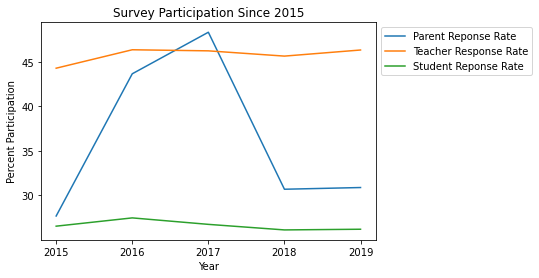

In [27]:
# plot participation over time
plt.plot('year', 'parent_participation', data=sum_res, label='Parent Reponse Rate')
plt.plot('year', 'teacher_participation', data=sum_res, label='Teacher Response Rate')
plt.plot('year', 'student_participation', data=sum_res, label='Student Reponse Rate')
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.xlabel('Year')
plt.ylabel('Percent Participation')
plt.title('Survey Participation Since 2015')
plt.legend(bbox_to_anchor=(1, 1));

In [28]:
# get the portion of schools participating, parent edition
pa_sc_2015 = len(responses[responses['parent_response_rate_2015'] == 0])/len(responses)
pa_sc_2016 = len(responses[responses['parent_response_rate_2016'] == 0])/len(responses) 
pa_sc_2017 = len(responses[responses['parent_response_rate_2017'] == 0])/len(responses)
pa_sc_2018 = len(responses[responses['parent_response_rate_2018'] == 0])/len(responses)
pa_sc_2019 = len(responses[responses['parent_response_rate_2019'] == 0])/len(responses)

# add it the the dataframe
sum_res['school_participation_parent'] = [pa_sc_2015, pa_sc_2016, pa_sc_2017, pa_sc_2018, pa_sc_2019]

In [29]:
# get the portion of schools participating, teacher edition
te_sc_2015 = len(responses[responses['teacher_response_rate_2015'] == 0])/len(responses)
te_sc_2016 = len(responses[responses['teacher_response_rate_2016'] == 0])/len(responses) 
te_sc_2017 = len(responses[responses['teacher_response_rate_2017'] == 0])/len(responses)
te_sc_2018 = len(responses[responses['teacher_response_rate_2018'] == 0])/len(responses)
te_sc_2019 = len(responses[responses['teacher_response_rate_2019'] == 0])/len(responses)

# add it the the dataframe
sum_res['school_participation_teacher'] = [te_sc_2015, te_sc_2016, te_sc_2017, te_sc_2018, te_sc_2019]

In [30]:
# get the portion of schools participating, student edition
st_sc_2015 = len(responses[responses['student_response_rate_2015'] == 0])/len(responses)
st_sc_2016 = len(responses[responses['student_response_rate_2016'] == 0])/len(responses) 
st_sc_2017 = len(responses[responses['student_response_rate_2017'] == 0])/len(responses)
st_sc_2018 = len(responses[responses['student_response_rate_2018'] == 0])/len(responses)
st_sc_2019 = len(responses[responses['student_response_rate_2019'] == 0])/len(responses)

# add it the the dataframe
sum_res['school_participation_student'] = [st_sc_2015, st_sc_2016, st_sc_2017, st_sc_2018, st_sc_2019]

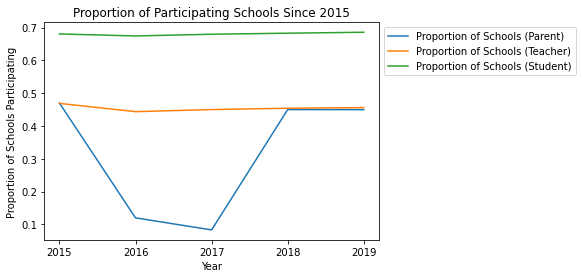

In [31]:
# plot school participation separated by parent, teacher, student
plt.plot('year', 'school_participation_parent', data=sum_res, label='Proportion of Schools (Parent)')
plt.plot('year', 'school_participation_teacher', data=sum_res, label='Proportion of Schools (Teacher)')
plt.plot('year', 'school_participation_student', data=sum_res, label='Proportion of Schools (Student)')
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.xlabel('Year')
plt.ylabel('Proportion of Schools Participating')
plt.title('Proportion of Participating Schools Since 2015')
plt.legend(bbox_to_anchor=(1, 1));

In [32]:
# schools with over 90% parent participation participation in 2015
responses[responses['parent_response_rate_2015'] > 90][['dbn', 'school_name']]

,dbn,school_name
1,01M019,p.s. 019 asher levy
39,02M042,p.s. 042 benjamin altman
43,02M077,p.s. 77 lower lab school
49,02M124,p.s. 124 yung wing
59,02M177,yorkville east middle school
...,...,...
1822,84X387,brilla college prep charter school
1836,84X482,dr. richard izquierdo health and science chart...
1838,84X488,the equality charter school
1849,84X705,family life academy charter school


In [33]:
# schools with over 90% parent participation participation in 2016
responses[responses['parent_response_rate_2016'] > 90][['dbn', 'school_name']]

,dbn,school_name
1,01M019,p.s. 019 asher levy
12,01M188,p.s. 188 the island school
39,02M042,p.s. 042 benjamin altman
49,02M124,p.s. 124 yung wing
55,02M150,p.s. 150
...,...,...
3109,Z075,nan
3110,Z076,nan
3111,Z077,nan
3112,Z078,nan


In [34]:
# schools with over 90% parent participation participation in 2017
responses[responses['parent_response_rate_2017'] > 90][['dbn', 'school_name']]

,dbn,school_name
1,01M019,p.s. 019 asher levy
10,01M142,p.s. 142 amalia castro
12,01M188,p.s. 188 the island school
39,02M042,p.s. 042 benjamin altman
49,02M124,p.s. 124 yung wing
...,...,...
3377,Z091,nan
3379,Z093,nan
3380,Z094,nan
3389,Z104,nan


In [35]:
# schools with over 90% parent participation participation in 2018
responses[responses['parent_response_rate_2018'] > 90][['dbn', 'school_name']]

,dbn,school_name
1,01M019,p.s. 019 asher levy
10,01M142,p.s. 142 amalia castro
12,01M188,p.s. 188 the island school
39,02M042,p.s. 042 benjamin altman
43,02M077,p.s. 77 lower lab school
...,...,...
3415,Z112,nan
3416,Z114,nan
3417,Z115,nan
3419,Z117,nan


In [36]:
# schools with over 90% parent participation participation in 2019
responses[responses['parent_response_rate_2019'] >90][['dbn', 'school_name']]

,dbn,school_name
0,01M015,p.s. 015 roberto clemente
1,01M019,p.s. 019 asher levy
10,01M142,p.s. 142 amalia castro
11,01M184,p.s. 184m shuang wen
12,01M188,p.s. 188 the island school
...,...,...
3450,Z123,nan
3451,Z124,nan
3452,Z125,nan
3453,Z126,nan


In [37]:
responses[responses['school_name'] == 'nan']

,dbn,school_name,parent_response_rate_2015,teacher_response_rate_2015,student_response_rate_2015,parent_response_rate_2016,teacher_response_rate_2016,student_response_rate_2016,parent_response_rate_2017,teacher_response_rate_2017,student_response_rate_2017,parent_response_rate_2018,teacher_response_rate_2018,student_response_rate_2018,parent_response_rate_2019,teacher_response_rate_2019,student_response_rate_2019
1861,02M544,nan,0.0,0.0,0.0,11.0,33.0,29.0,12.0,79.0,31.0,9.0,100.0,11.0,1.0,80.0,10.0
1862,03M291,nan,0.0,0.0,0.0,87.0,100.0,95.0,79.0,94.0,87.0,73.0,100.0,93.0,75.0,100.0,98.0
1863,10X033,nan,0.0,0.0,0.0,50.0,60.0,0.0,71.0,71.0,0.0,77.0,71.0,0.0,9.0,59.0,0.0
1864,10X668,nan,0.0,0.0,0.0,88.0,100.0,83.0,67.0,95.0,89.0,64.0,100.0,78.0,61.0,100.0,61.0
1865,11X326,nan,0.0,0.0,0.0,41.0,96.0,87.0,58.0,96.0,92.0,54.0,96.0,92.0,59.0,100.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,Z123,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,100.0,0.0
3451,Z124,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,100.0,0.0
3452,Z125,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,83.0,0.0
3453,Z126,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,100.0,0.0


In [38]:
# Schools with consistently high response rates (over 90%) from 2015-2019
responses[
    (responses['parent_response_rate_2015'] > 90) & (responses['parent_response_rate_2016'] > 90) &
    (responses['parent_response_rate_2017'] > 90) & (responses['parent_response_rate_2018'] > 90) &
    (responses['parent_response_rate_2019'] > 90) & (responses['teacher_response_rate_2015'] > 90) &
    (responses['teacher_response_rate_2016'] > 90) & (responses['teacher_response_rate_2017'] > 90) &
    (responses['teacher_response_rate_2018'] > 90) & (responses['teacher_response_rate_2019'] > 90) &
    (responses['student_response_rate_2015'] > 90) & (responses['student_response_rate_2016'] > 90) &
    (responses['student_response_rate_2017'] > 90) & (responses['student_response_rate_2018'] > 90) &
    (responses['student_response_rate_2019'] > 90)
    ]

,dbn,school_name,parent_response_rate_2015,teacher_response_rate_2015,student_response_rate_2015,parent_response_rate_2016,teacher_response_rate_2016,student_response_rate_2016,parent_response_rate_2017,teacher_response_rate_2017,student_response_rate_2017,parent_response_rate_2018,teacher_response_rate_2018,student_response_rate_2018,parent_response_rate_2019,teacher_response_rate_2019,student_response_rate_2019
298,06M349,harbor heights,100.0,92.0,98.0,96.0,100.0,99.0,100.0,100.0,99.0,99.0,100.0,100.0,100.0,100.0,100.0
834,16K035,m.s. 035 stephen decatur,99.0,100.0,99.0,100.0,100.0,100.0,98.0,100.0,98.0,98.0,100.0,97.0,92.0,100.0,99.0
1193,24Q264,academy of finance and enterprise,94.0,100.0,95.0,97.0,100.0,96.0,99.0,100.0,95.0,99.0,100.0,94.0,98.0,100.0,96.0
1469,30Q141,i.s. 141 the steinway,95.0,96.0,98.0,100.0,96.0,97.0,98.0,99.0,95.0,100.0,97.0,95.0,100.0,100.0,97.0
1485,30Q235,academy for new americans,97.0,100.0,99.0,96.0,100.0,99.0,91.0,100.0,99.0,91.0,100.0,98.0,93.0,100.0,100.0


### Math and ELA scores

In [39]:
ela_scores = pd.read_csv('../data/clean_scores/ela_scores_2015_to_2019.csv')
math_scores = pd.read_csv('../data/clean_scores/math_scores_2015_to_2019.csv')

In [40]:
ela_scores.head(2)

,dbn,school_name,grade,year,number_tested,mean_score
0,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2015,56,283.28570560000003
1,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,51,292.7450867


In [41]:
math_scores.head(2)

,dbn,school_name,grade,year,number_tested,mean_score
0,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2015,58,278.2930908
1,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,52,285.6730652


In [42]:
len(ela_scores), len(math_scores)

(5474, 5474)

In [43]:
ela_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dbn            5474 non-null   object
 1   school_name    5474 non-null   object
 2   grade          5474 non-null   object
 3   year           5474 non-null   int64 
 4   number_tested  5474 non-null   int64 
 5   mean_score     5474 non-null   object
dtypes: int64(2), object(4)
memory usage: 256.7+ KB


In [44]:
math_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dbn            5474 non-null   object
 1   school_name    5474 non-null   object
 2   grade          5474 non-null   object
 3   year           5474 non-null   int64 
 4   number_tested  5474 non-null   int64 
 5   mean_score     5474 non-null   object
dtypes: int64(2), object(4)
memory usage: 256.7+ KB


In [45]:
# it looks like the mean scores are not floats, so I need to convert them
ela_scores['mean_score'] = pd.to_numeric(ela_scores['mean_score'], errors='coerce')

In [46]:
# doing the same for math scores
math_scores['mean_score'] = pd.to_numeric(math_scores['mean_score'], errors='coerce')

In [47]:
math_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dbn            5474 non-null   object 
 1   school_name    5474 non-null   object 
 2   grade          5474 non-null   object 
 3   year           5474 non-null   int64  
 4   number_tested  5474 non-null   int64  
 5   mean_score     5473 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 256.7+ KB


In [48]:
ela_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5474 entries, 0 to 5473
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dbn            5474 non-null   object 
 1   school_name    5474 non-null   object 
 2   grade          5474 non-null   object 
 3   year           5474 non-null   int64  
 4   number_tested  5474 non-null   int64  
 5   mean_score     5473 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 256.7+ KB


In [49]:
# I will drop the missing data
math_scores.dropna(inplace=True)
ela_scores.dropna(inplace=True)

In [50]:
math_scores.shape, ela_scores.shape

((5473, 6), (5473, 6))

In [51]:
math_scores['dbn'].unique() != ela_scores['dbn'].unique()

array([False, False, False, ..., False, False, False])

In [52]:
# combine both dataframes
scores = ela_scores.merge(math_scores, on=['dbn', 'school_name', 'year'], suffixes=('_ela', '_math'))

In [53]:
scores.head()

,dbn,school_name,grade_ela,year,number_tested_ela,mean_score_ela,grade_math,number_tested_math,mean_score_math
0,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2015,56,283.285706,All Grades,58,278.293091
1,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2016,51,292.745087,All Grades,52,285.673065
2,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2017,67,308.328369,All Grades,69,306.536224
3,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2018,67,610.298523,All Grades,67,606.596985
4,01M015,P.S. 015 ROBERTO CLEMENTE,All Grades,2019,70,605.642883,All Grades,70,605.957153


In [54]:
scores.shape

(5472, 9)

In [55]:
# calculate combined score from math and ela
scores['combined_mean_score'] = (scores['mean_score_ela'] * scores['number_tested_ela'] + scores['mean_score_math'] * scores['number_tested_math']) / (scores['number_tested_math'] + scores['number_tested_ela'])

In [56]:
# drop some uncessary column
scores.drop(columns = ['grade_ela', 'grade_math'], inplace=True)

In [57]:
scores.head(2)

,dbn,school_name,year,number_tested_ela,mean_score_ela,number_tested_math,mean_score_math,combined_mean_score
0,01M015,P.S. 015 ROBERTO CLEMENTE,2015,56,283.285706,58,278.293091,280.745603
1,01M015,P.S. 015 ROBERTO CLEMENTE,2016,51,292.745087,52,285.673065,289.174746


In [58]:
# save these scores
scores.to_csv('../data/clean_scores/test_scores.csv')

### Survey Data per Year
Each survey data will be combined with the score data

In [59]:
# starting with 2015 data
student_15 = pd.read_csv('../data/clean_survey/2015_student.csv')
parent_15 = pd.read_csv('../data/clean_survey/2015_parent.csv')
teacher_15 = pd.read_csv('../data/clean_survey/2015_teacher.csv')

In [60]:
student_15.head()

,dbn,school_name,student_response_rate,1a_1,1a_2,1a_3,1a_4,1b_1,1b_2,1b_3,...,13a_3,13a_4,13b_1,13b_2,13b_3,13b_4,13c_1,13c_2,13c_3,13c_4
0,01M034,P.S. 034 Franklin D. Roosevelt,91.0,3.0,52.0,28.0,16.0,3.0,44.0,29.0,...,55.0,36.0,3.0,10.0,46.0,41.0,6.0,8.0,41.0,45.0
1,01M140,P.S. 140 Nathan Straus,97.0,1.0,38.0,43.0,18.0,0.0,38.0,40.0,...,45.0,47.0,1.0,5.0,43.0,51.0,3.0,9.0,41.0,47.0
2,01M184,P.S. 184m Shuang Wen,100.0,3.0,9.0,55.0,32.0,0.0,16.0,59.0,...,48.0,39.0,2.0,9.0,46.0,43.0,1.0,11.0,45.0,43.0
3,01M188,P.S. 188 The Island School,97.0,0.0,0.0,1.0,99.0,0.0,0.0,1.0,...,1.0,99.0,1.0,0.0,1.0,99.0,1.0,0.0,1.0,99.0
4,01M292,Henry Street School for International Studies,73.0,8.0,40.0,33.0,20.0,5.0,40.0,34.0,...,53.0,20.0,9.0,12.0,58.0,21.0,10.0,13.0,55.0,21.0


In [61]:
def merge_survey_per_year(df_list, year):
    '''This function will merge 3 survey-dataframes from the same yeartogether. 
    Needs a list of dataframes and the year from which the survey results come from.
    The list need to be provided in the order of student-, parent-, and teacher-survey.
    '''
    
    student, parent, teacher = df_list   
    
    # for student, add '_st' to all questions in anticipation of mergering
    student.columns = ['dbn', 'school_name', 'student_response_rate'] + list(student.columns[4:] + '_s') + ['year']

    # similar treatment for teacher and parent dataframes
    teacher.columns = ['dbn', 'school_name', 'teacher_response_rate'] + list(teacher.columns[4:] + '_t') + ['year']
    parent.columns = ['dbn', 'school_name', 'parent_response_rate'] + list(parent.columns[4:] + '_p') + ['year']
    
    # add a year column
    student['year'] = year
    parent['year'] = year
    teacher['year'] = year

    # merge student and teacher data
    survey = student.merge(teacher, on=['dbn', 'year'], suffixes=(None, '_y'))

    # drop the extrac column generated
    survey.drop(columns = ['school_name_y'], inplace=True)

    # merge parent data
    survey = survey.merge(parent, on=['dbn', 'year'], suffixes=(None, '_y'))
    survey.drop(columns = ['school_name_y'], inplace=True)
    
    return survey

In [62]:
survey_15 = merge_survey_per_year([student_15, parent_15, teacher_15], 2015)

In [63]:
survey_15

,dbn,school_name,student_response_rate,1a_2_s,1a_3_s,1a_4_s,1b_1_s,1b_2_s,1b_3_s,1b_4_s,...,10b_3_p,10b_4_p,10b_5_p,10b_6_p,10c_1_p,10c_2_p,10c_3_p,10c_4_p,10c_5_p,10c_6_p
0,01M034,P.S. 034 Franklin D. Roosevelt,91.0,3.0,52.0,28.0,16.0,3.0,44.0,29.0,...,0.0,0.0,8.0,25.0,67.0,0.0,0.0,0.0,25.0,33.0
1,01M140,P.S. 140 Nathan Straus,97.0,1.0,38.0,43.0,18.0,0.0,38.0,40.0,...,0.0,3.0,18.0,26.0,51.0,0.0,5.0,0.0,18.0,26.0
2,01M184,P.S. 184m Shuang Wen,100.0,3.0,9.0,55.0,32.0,0.0,16.0,59.0,...,5.0,0.0,23.0,41.0,23.0,10.0,8.0,3.0,23.0,38.0
3,01M188,P.S. 188 The Island School,97.0,0.0,0.0,1.0,99.0,0.0,0.0,1.0,...,3.0,0.0,9.0,45.0,36.0,6.0,3.0,6.0,9.0,39.0
4,01M292,Henry Street School for International Studies,73.0,8.0,40.0,33.0,20.0,5.0,40.0,34.0,...,0.0,5.0,15.0,65.0,5.0,10.0,0.0,5.0,20.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,84K979,Uncommon Charter HS 2,0.0,3.0,26.0,51.0,21.0,0.0,16.0,59.0,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
1132,84K989,Achievement First University Prep,0.0,1.0,36.0,43.0,20.0,1.0,40.0,38.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,50.0,50.0
1133,84K999,Uncommon Charter HS,0.0,3.0,28.0,52.0,17.0,1.0,32.0,48.0,...,0.0,0.0,8.0,46.0,46.0,0.0,0.0,0.0,17.0,50.0
1134,84M888,Harlem Village Academy HS,0.0,4.0,54.0,32.0,10.0,3.0,55.0,29.0,...,13.0,13.0,13.0,50.0,13.0,0.0,13.0,13.0,13.0,50.0


In [64]:
# proceed with 2016 data
student_16 = pd.read_csv('../data/clean_survey/2016_student.csv')
parent_16 = pd.read_csv('../data/clean_survey/2016_parent.csv')
teacher_16 = pd.read_csv('../data/clean_survey/2016_teacher.csv')

In [65]:
survey_16 = merge_survey_per_year([student_16, parent_16, teacher_16], 2016)

In [66]:
# response rates are in fractions for 2016, so change to percent to match other years
survey_16['student_response_rate'] = survey_16['student_response_rate'] * 100
survey_16['parent_response_rate'] = survey_16['parent_response_rate'] * 100
survey_16['teacher_response_rate'] = survey_16['teacher_response_rate'] * 100

In [67]:
# proceed with 2016 data
student_17 = pd.read_csv('../data/clean_survey/2017_student.csv')
parent_17 = pd.read_csv('../data/clean_survey/2017_parent.csv')
teacher_17 = pd.read_csv('../data/clean_survey/2017_teacher.csv')
survey_17 = merge_survey_per_year([student_17, parent_17, teacher_17], 2017)

In [68]:
# proceed with 2016 data
student_18 = pd.read_csv('../data/clean_survey/2018_student.csv')
parent_18 = pd.read_csv('../data/clean_survey/2018_parent.csv')
teacher_18 = pd.read_csv('../data/clean_survey/2018_teacher.csv')
survey_18 = merge_survey_per_year([student_18, parent_18, teacher_18], 2018)

In [69]:
# proceed with 2016 data
student_19 = pd.read_csv('../data/clean_survey/2019_student.csv')
parent_19 = pd.read_csv('../data/clean_survey/2019_parent.csv')
teacher_19 = pd.read_csv('../data/clean_survey/2019_teacher.csv')
survey_19 = merge_survey_per_year([student_19, parent_19, teacher_19], 2019)

In [70]:
# write these to file
survey_15.to_csv('../data/clean_survey/2015_survey.csv', index=False)
survey_16.to_csv('../data/clean_survey/2016_survey.csv', index=False)
survey_17.to_csv('../data/clean_survey/2017_survey.csv', index=False)
survey_18.to_csv('../data/clean_survey/2018_survey.csv', index=False)
survey_19.to_csv('../data/clean_survey/2019_survey.csv', index=False)

In [71]:
# combine with scores
survey_scores_15 = survey_15.merge(scores, how='left', on=['dbn', 'year'], suffixes=[None, '_y'])
# survey_scores_15.drop(columns=['school_name_y'], inplace=True)

In [72]:
survey_scores_15.shape

(1136, 1564)

In [73]:
# verify that it merged as expected
survey_scores_15[survey_scores_15['dbn'] == '01M034']

,dbn,school_name,student_response_rate,1a_2_s,1a_3_s,1a_4_s,1b_1_s,1b_2_s,1b_3_s,1b_4_s,...,10c_3_p,10c_4_p,10c_5_p,10c_6_p,school_name_y,number_tested_ela,mean_score_ela,number_tested_math,mean_score_math,combined_mean_score
0,01M034,P.S. 034 Franklin D. Roosevelt,91.0,3.0,52.0,28.0,16.0,3.0,44.0,29.0,...,0.0,0.0,25.0,33.0,P.S. 034 FRANKLIN D. ROOSEVELT,247.0,296.198395,254.0,294.807098,295.493027


In [74]:
# drop all rows with NaNs
survey_scores_15.dropna(inplace=True)

In [75]:
def add_scores(survey_df, scores_df):
    '''This will add scores of the corresponding year to the survey data.
    Needs bothe survey dataframe and the scores dataframe to be combined.
    '''
    # combine with scores
    survey_scores = survey_df.merge(scores_df, how='left', on=['dbn', 'year'], suffixes=[None, '_y'])
    survey_scores.drop(columns=['school_name_y'], inplace=True)
    # drop all rows with NaNs because missing scores is not going to be useful
    survey_scores.dropna(inplace=True)
    
    return survey_scores

In [76]:
# combine survey data and scores data from 2016
survey_scores_16 = add_scores(survey_16, scores)

In [77]:
# repeat with 2017, 2018, and 2019
survey_scores_17 = add_scores(survey_17, scores)
survey_scores_18 = add_scores(survey_18, scores)
survey_scores_19 = add_scores(survey_19, scores)

In [78]:
# student rate in 2019 also need conversion to %
survey_scores_19['student_response_rate'] = survey_scores_19['student_response_rate'] * 100

In [79]:
survey_scores_15.to_csv('../data/survey_scores_clean_15.csv', index=False)
survey_scores_16.to_csv('../data/survey_scores_clean_16.csv', index=False)
survey_scores_17.to_csv('../data/survey_scores_clean_17.csv', index=False) 
survey_scores_18.to_csv('../data/survey_scores_clean_18.csv', index=False) 
survey_scores_19.to_csv('../data/survey_scores_clean_19.csv', index=False)

## Getting school location data

In [215]:
# 2019 dta for school locations
school_loc = pd.read_json('https://data.cityofnewyork.us/resource/wg9x-4ke6.json')

In [216]:
school_loc.head(2)

,fiscal_year,system_code,location_code,location_name,beds,managed_by_name,location_type_description,location_category_description,grades_text,grades_final_text,...,administrative_district_name,community_school_sup_name,tier_3_support_location_name,tier_3_support_leader_name,tier_2_support_location_name,highschool_network_location,highschool_network_name,highschool_network,community_district_1,police_precinct
0,2020,15K001,K001,P.S. 001 The Bergen,331500010001,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 15,"SKOP, ANITA",NYCDOE Borough Office - Brooklyn North,NULL,School Support Team 5- Brooklyn North,NULL,NULL,NULL,307,72
1,2020,17K002,K002,Parkside Preparatory Academy,331700010002,DOE,General Academic,Junior High-Intermediate-Middle,"06,07,08,SE","06,07,08",...,COMMUNITY SCHOOL DISTRICT 17,"ELLIS, CLARENCE",NYCDOE Borough Office - Brooklyn South,Mauriciere de Govia,School Support Team 2- Brooklyn South,NULL,NULL,NULL,309,71


In [218]:
school_loc[school_loc['system_code'] == '01M015']

,fiscal_year,system_code,location_code,location_name,beds,managed_by_name,location_type_description,location_category_description,grades_text,grades_final_text,...,administrative_district_name,community_school_sup_name,tier_3_support_location_name,tier_3_support_leader_name,tier_2_support_location_name,highschool_network_location,highschool_network_name,highschool_network,community_district_1,police_precinct
709,2020,01M015,M015,P.S. 015 Roberto Clemente,310100010015,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",...,COMMUNITY SCHOOL DISTRICT 01,"CHAN, CARRY",NYCDOE Borough Office - Manhattan,"CHU, YUET",School Support Team 3- Manhattan,NULL,NULL,NULL,103,9
